Class: CS 4267/01

Term: Spring 2020

Name: Sepehr Goshayeshi

Instructor: Mohammed Aledhari

Programming Assignment 3

## Import Necessary Libraries

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


## Specify Image Directories

In [2]:
train_dir = '/floyd/input/catdog_dataset/training_set' # directory with training images
test_dir = '/floyd/input/catdog_dataset/test_set' # directory with test images
validation_dir = '/floyd/input/catdog_dataset/validation_set' # directory with validation images

## Model Definition

In [3]:
# Initializing the ConvNet
model = Sequential()

# Step 1 & 2 - Building the Convolution and Pooling Layers
model.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

# Adding The Second Convolutional Layer
model.add(Convolution2D(32, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

# Step 3 - Building the Flattening Layer
model.add(Flatten())

# Step 4 - Building the Fully Connected Layer
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) 
# sigmoid crunches number to between 0 to 1 probability: close to 0 is cat, 1 is dog

# Compiling the ConvNet
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

## Image Generators

sources: 

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescales images by 1/255

validation_datagen = ImageDataGenerator(rescale=1./255) # Rescales images by 1/255

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32,
        class_mode='binary',
        shuffle='true',
        seed=42)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary') 

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=1,
        class_mode='binary',
        shuffle='false')

Found 12000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


## Train Model

In [6]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=int(12000/32),
                    epochs=50, validation_data=validation_generator, validation_steps=int(4000/32))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 375 steps, validate for 125 steps
Epoch 1/50
375/375 [==============================] - 95s 253ms/step - loss: 0.6867 - accuracy: 0.5388 - val_loss: 0.6737 - val_accuracy: 0.5790
Epoch 2/50
375/375 [==============================] - 94s 252ms/step - loss: 0.6436 - accuracy: 0.6285 - val_loss: 0.6150 - val_accuracy: 0.6457
Epoch 3/50
375/375 [==============================] - 94s 251ms/step - loss: 0.6134 - accuracy: 0.6597 - val_loss: 0.5749 - val_accuracy: 0.6898
Epoch 4/50
375/375 [==============================] - 94s 252ms/step - loss: 0.5949 - accuracy: 0.6797 - val_loss: 0.5609 - val_accuracy: 0.7138
Epoch 5/50
375/375 [==============================] - 94s 252ms/step - loss: 0.5820 - accuracy: 0.6882 - val_loss: 0.5579 - val_accuracy: 0.7088
Epoch 6/50
375/375 [==============================] - 94s 251ms/step - loss: 0.5756 - accuracy: 0.6920 - 

Mean Accuracy for training and validation

In [7]:
print("Mean accuracy for training:", np.mean(history.history['accuracy']))
print("Mean accuracy for validation:", np.mean(history.history['val_accuracy']))

Mean accuracy for training: 0.72568
Mean accuracy for validation: 0.74411994


Mean Loss for training and validation

In [8]:
print("Mean loss for training:", np.mean(history.history['loss']))
print("Mean loss for validation:", np.mean(history.history['val_loss']))

Mean loss for training: 0.5325509813833237
Mean loss for validation: 0.5063471019601822


Loss Graph to Determine there is no Overfitting or Underfitting
Source: 

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

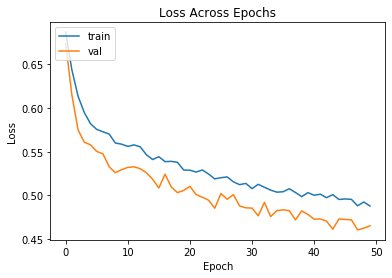

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Across Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Save Weights

In [10]:
model.save_weights('model1.h5')

Load Weights

In [6]:
model.load_weights('model1.h5')

## Evaluate testing

In [7]:
score = model.evaluate_generator(test_generator, steps=int(4000))

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


In [8]:
print('Testing loss:', score[0])
print('Testing accuracy:', score[1])

Testing loss: 0.45640681637947544
Testing accuracy: 0.786


Confusion Matrix

In [9]:
probabilities = model.predict_generator(test_generator, 4000)

y_true = test_generator.classes
y_pred = probabilities > 0.5

confusion_matrix(y_true, y_pred)

Instructions for updating:
Please use Model.predict, which supports generators.


array([[1044,  956],
       [1086,  914]])

## Predict My Two Cats Kimba & Meow and Dog Celebrity Topi

In [12]:
img = image.load_img('/floyd/home/topi.jpg', target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255

prediction = model.predict(x)[0]

if(prediction < 0.5):
    print("I am a cat.")
else:
    print("I am a dog.")

I am a dog.
